<a href="https://colab.research.google.com/github/Arunimad/CCIR_MLENG/blob/main/TA3(Answers_penguins).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

Dataset - Penguins

This analysis aims to build a simple linear regression model to help caretakers who manage the penguin habitats adequately feed their population. They want to know if certain characteristics of the birds are related to body mass so they can better manage their feeding schedules. The dataset includes structural measurements of penguins, such as bill length and body mass.

(refs. https://medium.com/@langatkevin/simple-linear-regression-model-6b3262528680)

In [ ]:
#Load the dataset
penguins = pd.read_csv('https://raw.githubusercontent.com/Arunimad/CCIR_MLENG/main/penguins.csv')
# Examine first 5 rows of dataset
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Dealing wtih missing values

In [ ]:
penguins = penguins.dropna()
penguins.reset_index(inplace=True, drop=True)

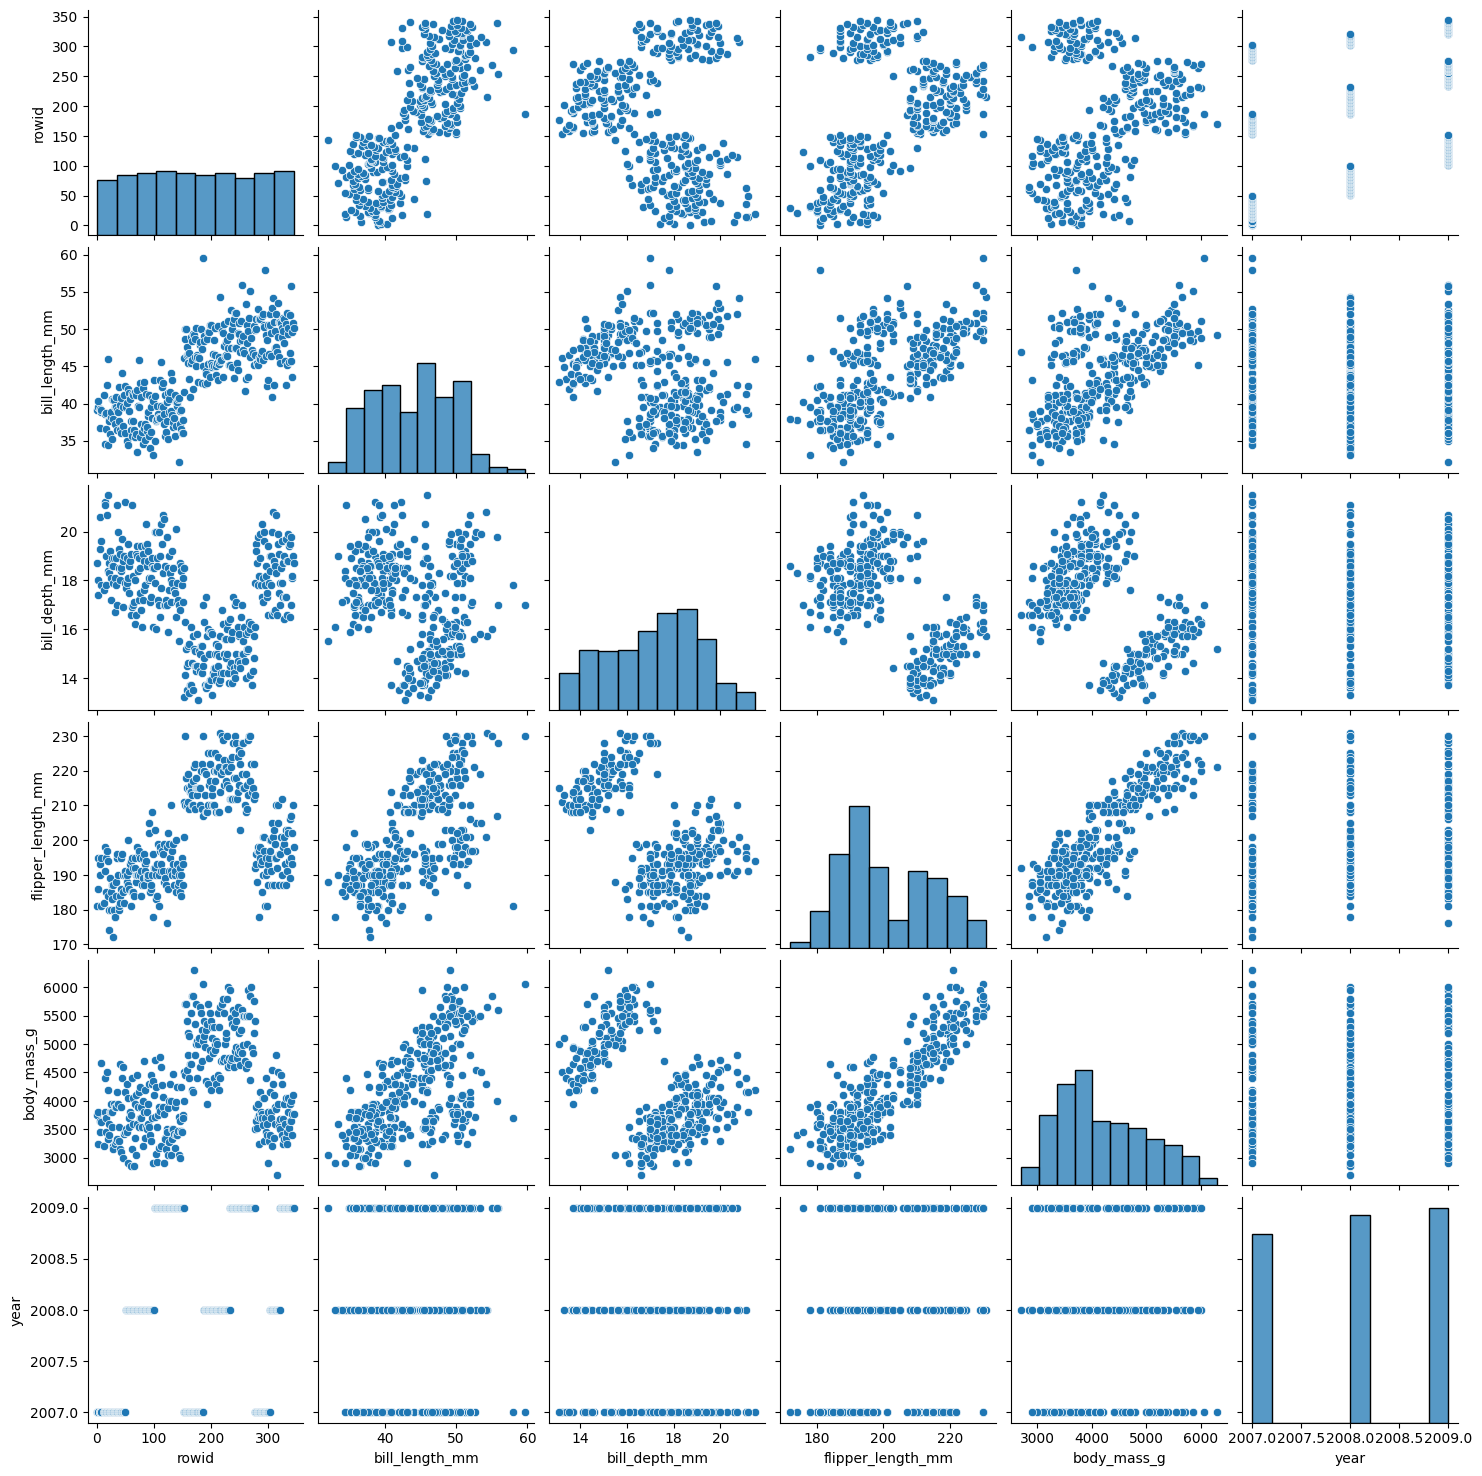

In [ ]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins)

From the scatterplot matrix above, we can observe a few linear relationships:

bill length (mm) and flipper length (mm)

bill length (mm) and body mass (g)

flipper length (mm) and body mass (g)

We will subset the columns of your interest: bill length (mm) and body mass (g).

In [ ]:
# Subset Data
ols_data = penguins[["bill_length_mm", "body_mass_g"]]

We are going to try 'Stats model' this time

In [ ]:
#import the ols function
from statsmodels.formula.api import ols

# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

# Build OLS, fit model to data
OLS = ols (formula = ols_formula, data = ols_data)
model = OLS.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           1.54e-32
Time:                        18:43:48   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We need to visualise the regression line using Plotly.

In [ ]:
# Create a scatter plot with regression line using Plotly Express

fig = px.scatter(ols_data,
                 x="bill_length_mm",
                 y="body_mass_g",
                 height = 500,
                 width= 900,
                 title="Scatter Plot with Regression Line",
                 trendline="ols")

fig.show()

Okay. Now lets try some basic residual analysis

To easily check the model assumptions and create relevant visualisations, we need to subset the X variable by isolating only the bill_length_mm column and save the predicted values using the model.predict(x) function.

In [ ]:
model.predict([40])

In [ ]:
# Subset X variable
#X = ols_data["bill_length_mm"]

# Get predictions from model
values = model.predict(40)
print(values)

TypeError: object of type 'int' has no len()

We will then proceed to save the model residual as a variable by using the model.resid attribute.

In [ ]:
# Calculate residuals
residuals = model.resid

In [ ]:
# Create a histogram of residuals using Plotly Express
fig = px.histogram (residuals,
                   width = 1000,
                   title="Histogram of Residuals")

fig.show()

QQ plots (OPTIONAL)

Another way to check the normality function is to create a quantile-quantile, or Q-Q, plot. If the residuals are normally distributed, we expect a straight diagonal line from the bottom left to the upper right of the Q-Q plot. Create a Q-Q plot by using the qqplot function from the statsmodels.api package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed except at the ends of the distribution.

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

homoscedasticity assumption

In [ ]:
fig = px.scatter(x = fitted_values,
                 y = residuals,
                 width = 1000,
                 labels = {"x" :"Fitted Values", "y" : "Residuals"})


# Add a reference line at residuals = 0
fig.add_hline(y=0,
              line_dash="solid",
              line_color="blue")

fig.show()

Lets go back to model.summary

In [ ]:
model.summary()

**Dependent variable:** Dependent variable is one that is going to depend on other variables. In this regression analysis Y is our dependent variable because we want to analyse the effect of X on Y.

**Model:** The method of Ordinary Least Squares(OLS) is most widely used model due to its efficiency. This model gives best approximate of true population regression line. The principle of OLS is to minimize the square of errors ( ∑ei2 ).

**Number of observations:** The number of observation is the size of our sample,

**Degree of freedom(df) of residuals: **
Degree of freedom is the number of independent observations on the basis of which the sum of squares is calculated.

**Coefficient term:** The coefficient term tells the change in Y for a unit change in X  i.e if X rises by 1 unit then Y rises by 0.7529. If you are familiar with derivatives then you can relate it as the rate of change of Y with respect to X .

**Standard error of parameters:** Standard error is also called the standard deviation. Standard error shows the sampling variability of these parameters.

**R-squared:** It signifies the “percentage variation in dependent that is explained by independent variables”

**Adj. R-squared:** This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.


**Prob(F-Statistic):** This tells the overall significance of the regression. This is to assess the significance level of all the variables together unlike the t-statistic that measures it for individual variables. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.

*(Disclaimer) Even more confusing terms ahead*

**AIC/BIC:** It stands for Akaike’s Information Criteria and is used for model selection. It penalizes the errors mode in case a new variable is added to the regression equation. It is calculated as number of parameters minus the likelihood of the overall model. A lower AIC implies a better model. Whereas, BIC stands for Bayesian information criteria and is a variant of AIC where penalties are made more severe.

**Prob(Omnibus):** One of the assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption.

**Durbin-watson:** Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred.

**Prob(Jarque-Bera):** It i in line with the Omnibus test. It is also performed for the distribution analysis of the regression errors. It is supposed to agree with the results of Omnibus test. A large value of JB test indicates that the errors are not normally distributed.